In [597]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [598]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

In [599]:
response = requests.get(endpoint)

In [600]:
response

<Response [200]>

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [601]:
params = {
    "Year": "2016",
    "Query Text": "fire"
}

In [602]:
response = requests.get(endpoint, params = params)

In [603]:
response

<Response [200]>

In [604]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [605]:
query_fire = pd.DataFrame(res)
query_fire

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [606]:
print(query_fire[query_fire['query_count'] == query_fire['query_count'].max()])


  month_name  year query_count query_text
7     August  2016          47       fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [607]:
#Filtered for query count >100 and set call limit to 50K to pull all rows
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=Query_Count > 100&$limit=50000'

response2 = requests.get(endpoint2)
response2
#$limit=50000

<Response [200]>

In [608]:
res2 = response2.json()

In [609]:
 high_queries = pd.DataFrame(res2)
high_queries

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
1257,September,2018,750,annual enrollment,NaN
1258,October,2018,816,annual enrollment,NaN
1259,January,2019,2646,Nashville,1
1260,September,2019,5327,directory,9


In [610]:
len(high_queries)

1262

3.Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [611]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=Query_Count > 100&$limit=50000&Query Text=codes'

response3 = requests.get(endpoint3)
response3

<Response [200]>

In [612]:
res3 = response3.json()
codes_100 = pd.DataFrame(res3)
codes_100

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5


In [613]:
len(codes_100)

56

4.Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [614]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

response4 = requests.get(endpoint4)
response4

<Response [200]>

In [615]:
res4 = response4.json()
maps_query = pd.DataFrame(res4)
maps_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   43677 non-null  object
 1   year         43677 non-null  object
 2   query_count  43676 non-null  object
 3   query_text   43677 non-null  object
 4   month        15177 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [616]:
#maps_query = maps_query[maps_query['query_text']== 'codes']
maps_query = maps_query.loc[maps_query['query_text'] == 'maps']
maps_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 42682
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   82 non-null     object
 1   year         82 non-null     object
 2   query_count  82 non-null     object
 3   query_text   82 non-null     object
 4   month        25 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [617]:
maps_query['query_count'] = pd.to_numeric(maps_query['query_count'])
#maps_query["year"] = pd.to_datetime(maps_query["year"])
maps_query['month'] = pd.to_numeric(maps_query['month'])
maps_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 42682
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month_name   82 non-null     object 
 1   year         82 non-null     object 
 2   query_count  82 non-null     int64  
 3   query_text   82 non-null     object 
 4   month        25 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ KB


In [618]:
maps_query.sort_values(
    by = ['year', 'month'],
    axis = 0, 
    ascending = True, 
    inplace = False, 
    kind = 'quicksort', 
    na_position = 'last', 
    ignore_index = False, 
    key = None
)

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11.0
39688,December,2020,113,maps,12.0
41188,March,2021,132,maps,3.0
41683,April,2021,148,maps,4.0


In [619]:
maps_query = maps_query.groupby(['year','month_name'])['query_count'].sum().reset_index()

In [620]:
maps_query

,year,month_name,query_count
0,2014,April,152
1,2014,August,118
2,2014,December,97
3,2014,February,140
4,2014,January,97
...,...,...,...
77,2020,November,86
78,2020,October,127
79,2021,April,148
80,2021,June,151


In [621]:
#failed attempts at line plot
#plt.plot(maps_query)
#date = maps_query['year'], ['month']
#value = maps_query['query_count']
#fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(date, value);
# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
#fig.autofmt_xdate()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

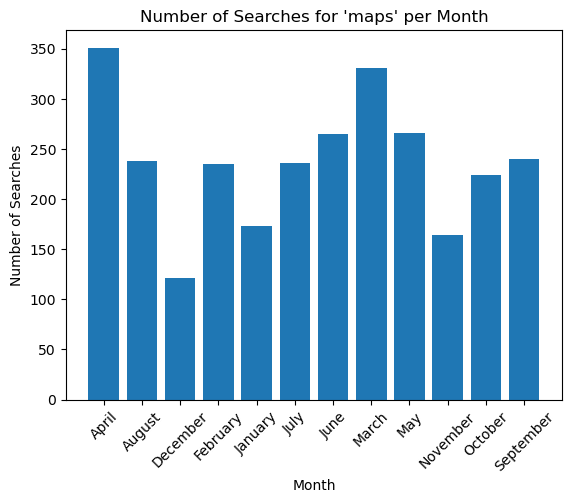

In [623]:
# Create bars
plt.bar(maps_query['month_name'], maps_query['query_count'])
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.title("Number of Searches for 'maps' per Month")
plt.xticks(rotation=45)